In [1]:
# Importing Libraries
import pandas as pd

In [2]:
# Reading dateset
df=pd.read_csv("data.csv")
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [3]:
df=df[["text","relevance"]]
df.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,yes
1,The Wall Street Journal Online</br></br>The Mo...,no
2,WASHINGTON -- In an effort to achieve banking ...,no
3,The statistics on the enormous costs of employ...,no
4,NEW YORK -- Indecision marked the dollar's ton...,yes


In [4]:
df["relevance"].value_counts()

no          6571
yes         1420
not sure       9
Name: relevance, dtype: int64

In [5]:
# removing relevance == not sure
df=df[df.relevance != "not sure"]
df.shape

(7991, 2)

In [6]:
# Text Preproccessing
# 1. lowering the string in dataset
df["text"]=df["text"].str.lower()
df.head()

,text,relevance
0,new york -- yields on most certificates of dep...,yes
1,the wall street journal online</br></br>the mo...,no
2,washington -- in an effort to achieve banking ...,no
3,the statistics on the enormous costs of employ...,no
4,new york -- indecision marked the dollar's ton...,yes


In [7]:
#2. Removing HTML tags
import re
def remove_html_tags(text):
    pattern=re.compile("<.*?>")
    return pattern.sub(r'',text)

In [8]:
df["text"]=df["text"].apply(remove_html_tags)

In [9]:
#3. Removing URLs
def remove_urls(text):
    pattern =re.compile(r"https?://\S+|www\.\S+")
    return pattern.sub(r'',text)

In [10]:
df["text"]=df["text"].apply(remove_urls)
df.head()

,text,relevance
0,new york -- yields on most certificates of dep...,yes
1,the wall street journal onlinethe morning brie...,no
2,washington -- in an effort to achieve banking ...,no
3,the statistics on the enormous costs of employ...,no
4,new york -- indecision marked the dollar's ton...,yes


In [11]:
#4. Removing Punchtuations
import string
def remove_punctuations(text):
    for char in string.punctuation:
        text=text.replace(char,"")
    return text

In [12]:
df["text"]=df["text"].apply(remove_punctuations)
df.head()

,text,relevance
0,new york yields on most certificates of depos...,yes
1,the wall street journal onlinethe morning brie...,no
2,washington in an effort to achieve banking re...,no
3,the statistics on the enormous costs of employ...,no
4,new york indecision marked the dollars tone a...,yes


In [13]:
# 5. Removing Stopwords
from nltk.corpus import stopwords
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words("english"):
            new_text.append(" ")
        else:
            new_text.append(word)

    return " ".join(new_text)

In [14]:
df["text"]=df["text"].apply(remove_stopwords)
df.head()

,text,relevance
0,new york yields certificates deposit off...,yes
1,wall street journal onlinethe morning brief ...,no
2,washington effort achieve banking reform...,no
3,statistics enormous costs employee dru...,no
4,new york indecision marked dollars tone tr...,yes


In [15]:
# changing target values to numerical
df["relevance"]=df["relevance"].replace(["yes","no"],[1,0])
df.head()

,text,relevance
0,new york yields certificates deposit off...,1
1,wall street journal onlinethe morning brief ...,0
2,washington effort achieve banking reform...,0
3,statistics enormous costs employee dru...,0
4,new york indecision marked dollars tone tr...,1


In [60]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X=df["text"]
y=df["relevance"]
print("Shape of whole data column data",X.shape,y.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
print("Training data shape",X_train.shape,y_train.shape)
print("Testing data shape",X_test.shape,y_test.shape)

Shape of whole data column data (7991,) (7991,)
Training data shape (5993,) (5993,)
Testing data shape (1998,) (1998,)


In [61]:
# Converting data into vectors
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train_dtm=cv.fit_transform(X_train)
X_test_dtm=cv.transform(X_test)
print("Shape of vectors",X_train_dtm.shape,X_test_dtm.shape)

Shape of vectors (5993, 66697) (1998, 66697)


In [66]:
# model fitting
from sklearn.neighbors import KNeighborsClassifier 
classifier_knn=KNeighborsClassifier(n_neighbors=2)
classifier_knn.fit(X_train_dtm,y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
# Making Prediction 
y_pred_class=classifier_knn.predict(X_test_dtm)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of our model is:",accuracy_score(y_test,y_pred_class)*100)

Accuracy of our model is: 82.78278278278279


Accuracy:  0.8278278278278278
ROC_AOC_Score:  0.5433237633132751


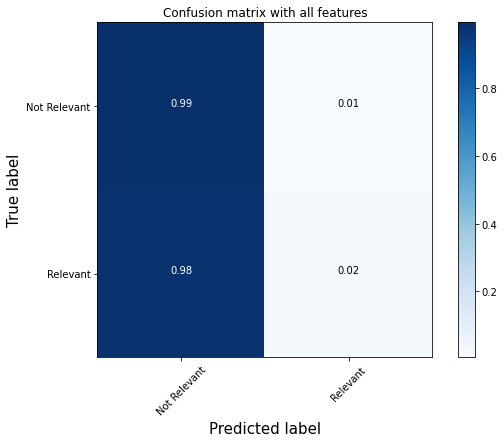

In [77]:
# making confussion matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

y_pred_prob = classifier_knn.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

In [79]:
df.head()

,text,relevance
0,new york yields certificates deposit off...,1
1,wall street journal onlinethe morning brief ...,0
2,washington effort achieve banking reform...,0
3,statistics enormous costs employee dru...,0
4,new york indecision marked dollars tone tr...,1


In [98]:
d={
    "True Values":y_test,
    "Predicted Values":y_pred_class
}
result=pd.DataFrame(d)
result.to_csv("result.csv",index=False)